## 步骤
1. 整理数据：区分Y变量→转化分类变量→区分训练集和测试集→标准化变量
2. 预测test数据
3. 选择模型参数，使用gridsearch进行参数选择
4. 作图评估模型

In [2]:
#加载包
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#读取数据集
df = pd.read_csv("adultTest.csv")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
#查看Y变量
df["class"].value_counts()

 <=50K    24720
 >50K      7841
Name: class, dtype: int64

In [4]:
#定义Y变量
df["class"] = df["class"].map(lambda s :s.strip(" "))  ##将Y变量包含的空格剔除
df.loc[df["class"] == "<=50K", "target"] = 0
df.loc[df["class"] != "<=50K", "target"] = 1
pd.crosstab(df["class"], df["target"])

target,0.0,1.0
class,,
<=50K,24720,0
>50K,0,7841


In [5]:
#查看分类变量与连续变量
df.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
education-num       int64
marital-status     object
occupation         object
relationship       object
race               object
sex                object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
class              object
target            float64
dtype: object

In [6]:
df.dtypes == 'O'  # 0为分类变量

age               False
workclass          True
fnlwgt            False
education          True
education-num     False
marital-status     True
occupation         True
relationship       True
race               True
sex                True
capital-gain      False
capital-loss      False
hours-per-week    False
native-country     True
class              True
target            False
dtype: bool

In [7]:
#将分类变量转化为0-1变量
df_num = pd.get_dummies(df, df.loc[:,df.dtypes == 'O'].columns)
df_num.columns

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'target', 'workclass_ ?', 'workclass_ Federal-gov',
       'workclass_ Local-gov',
       ...
       'native-country_ Scotland', 'native-country_ South',
       'native-country_ Taiwan', 'native-country_ Thailand',
       'native-country_ Trinadad&Tobago', 'native-country_ United-States',
       'native-country_ Vietnam', 'native-country_ Yugoslavia', 'class_<=50K',
       'class_>50K'],
      dtype='object', length=111)

In [8]:
df_num.drop(["class_<=50K", "class_>50K"], inplace= True , axis = 1)  #沿着列标签向执行删除
df_num.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,target,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,13,2174,0,40,0.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
#将数据集划分为70%训练集，30%测试集
xdata = df_num.drop("target", axis = 1)
ydata = df_num["target"]
xdata.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
from sklearn.model_selection import train_test_split

In [11]:
xtrain,xtest,ytrain,ytest = train_test_split(xdata, ydata, train_size = 0.7)

In [12]:
xtrain.shape

(22792, 108)

In [13]:
xtest.shape

(9769, 108)

In [14]:
ytrain.value_counts()

0.0    17286
1.0     5506
Name: target, dtype: int64

In [4]:
#标准化
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

In [16]:
std.fit(xtrain)  #必须使用训练集进行fit（根据训练集计算平均值和标准差，随后应用到测试集上）

StandardScaler(copy=True, with_mean=True, with_std=True)

In [17]:
xtrain_s = std.transform(xtrain)   #将训练集的标准化应用到训练集和测试集上
xtest_s  = std.transform(xtest)

In [5]:
#建立Logistic回归模型
from sklearn.linear_model import LogisticRegression

In [19]:
#定义模型和参数
lr = LogisticRegression(C=1.0, max_iter=100)

In [20]:
#建模
lr.fit(xtrain_s, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [21]:
lr.predict(xtest_s)  #对测试集结果进行分类

array([ 1.,  0.,  0., ...,  1.,  1.,  0.])

In [22]:
lr.predict_proba(xtest_s)   #对测试集结果概率进行预测，第一列预测Y=0， 第二列预测Y=1，默认以0.5为判断阈值

array([[ 0.05591259,  0.94408741],
       [ 0.99785286,  0.00214714],
       [ 0.57085138,  0.42914862],
       ..., 
       [ 0.42984669,  0.57015331],
       [ 0.22101823,  0.77898177],
       [ 0.92871639,  0.07128361]])

In [23]:
lr.score(xtest_s, ytest)  #准确率

0.8488074521445389

In [24]:
#对模型参数进行修改，找到最优化结果：cross validation
from sklearn.model_selection import GridSearchCV

In [25]:
# 定义模型和参数
lr = LogisticRegression()
param = {"C":[0.1,1,10], "max_iter":[10,100,200]}

### C : float, optional (default=1.0) Inverse of regularization strength; 
##### must be a positive float. Like in support vector machines, smaller values specify stronger regularization.
### max_iter : int
##### Useful only for the newton-cg, sag and lbfgs solvers. Maximum number of iterations taken for the solvers to converge.

In [26]:
gs = GridSearchCV(lr, param, cv=5, scoring = "f1")   #cv=5 将数据分为5份，以F1值为评估标准

In [27]:
gs.fit(xtrain_s, ytrain)  #根据参数训练模型

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10], 'max_iter': [10, 100, 200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=0)

In [28]:
gs.cv_results_  #共进行45次建模， 3×3×5

{'mean_fit_time': array([ 0.67370758,  0.65510793,  0.65206742,  0.83614388,  0.84238377,
         0.83302393,  0.97518144,  0.98754277,  1.00088382]),
 'mean_score_time': array([ 0.00311995,  0.        ,  0.00311995,  0.00623984,  0.00623994,
         0.00623994,  0.00311995,  0.00050001,  0.00411987]),
 'mean_test_score': array([ 0.66471923,  0.66471923,  0.66471923,  0.66385776,  0.66385776,
         0.66385776,  0.66326521,  0.66326521,  0.66326521]),
 'mean_train_score': array([ 0.66852546,  0.66852546,  0.66852546,  0.66863993,  0.66863993,
         0.66863993,  0.66865548,  0.66865548,  0.66865548]),
 'param_C': masked_array(data = [0.1 0.1 0.1 1 1 1 10 10 10],
              mask = [False False False False False False False False False],
        fill_value = ?),
 'param_max_iter': masked_array(data = [10 100 200 10 100 200 10 100 200],
              mask = [False False False False False False False False False],
        fill_value = ?),
 'params': ({'C': 0.1, 'max_iter': 10},
  

In [29]:
gs.best_params_  #选择最佳参数

{'C': 0.1, 'max_iter': 10}

In [6]:
? LogisticRegression()

Object ` LogisticRegression()` not found.


In [30]:
#画图进行模型评估
from sklearn.metrics import precision_recall_curve,roc_curve,classification_report

In [31]:
precision,recall,thresholds = precision_recall_curve(ytest, gs.predict_proba(xtest_s)[:,1])   #提取最优模型中预测为1的数值

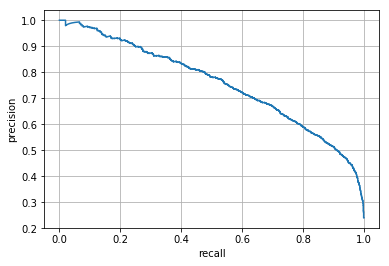

In [32]:
plt.plot(recall, precision)
plt.xlabel("recall")
plt.ylabel("precision")
plt.grid()

In [33]:
thresholds.shape

(9733,)

In [34]:
precision.shape

(9734,)

In [35]:
thr_add = np.append(0,thresholds)

In [71]:
re = pd.Series(recall, name= "recall")
pre = pd.Series(precision, name= "precision")
thr = pd.Series(thresholds, name= "cutoffs")

In [72]:
df_T = pd.DataFrame([re, pre, thr]).T
df_T.head()

,recall,precision,cutoffs
0,1.000000,0.239832,0.000208
1,0.999572,0.239753,0.000212
2,0.999572,0.239778,0.000223
3,0.999572,0.239803,0.000228
4,0.999572,0.239827,0.000233


In [74]:
df_T.to_csv("df.csv")

In [47]:
df_T.loc[df_T["precision"]>=0.85]  #查看precision>0.85时的阈值和recall值

,recall,precision,cutoffs
8732,0.364454,0.850150,0.720184
8733,0.364026,0.850000,0.720203
8735,0.363597,0.850701,0.720780
8736,0.363169,0.850552,0.721131
8737,0.362741,0.850402,0.721317
8738,0.362313,0.850251,0.721464
8739,0.362313,0.851107,0.721521
8740,0.362313,0.851964,0.721759
8741,0.362313,0.852823,0.721803
8742,0.362313,0.853683,0.722403


In [45]:
print(classification_report(ytest, gs.predict(xtest_s)))   #阈值默认为0.5时的分类结果

             precision    recall  f1-score   support

        0.0       0.88      0.93      0.90      7434
        1.0       0.72      0.60      0.66      2335

avg / total       0.84      0.85      0.84      9769



In [56]:
fpr, tpr, throc = roc_curve(ytest, gs.predict_proba(xtest_s)[:,1]) 

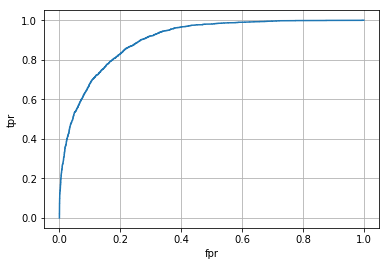

In [57]:
plt.plot(fpr, tpr)
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.grid()

In [58]:
fpr.shape

(1968,)

In [60]:
throc.shape

(1968,)

In [64]:
fpr = pd.Series(fpr, name= "fpr")
tpr = pd.Series(tpr, name= "tpr")
throc = pd.Series(throc, name= "cutoffs")
df_ROC = pd.DataFrame([fpr, tpr, throc]).T
df_ROC.head()

,fpr,tpr,cutoffs
0,0.000000,0.000428,1.000000
1,0.000000,0.020128,1.000000
2,0.000135,0.020128,0.999995
3,0.000135,0.065953,0.991949
4,0.000269,0.065953,0.991771


In [78]:
df_ROC.loc[df_ROC["cutoffs"] <=0.36]

,fpr,tpr,cutoffs
978,0.122814,0.723340,0.359443
979,0.122814,0.723769,0.359186
980,0.123890,0.723769,0.357999
981,0.123890,0.724197,0.357996
982,0.124294,0.724197,0.357435
983,0.124294,0.724625,0.357326
984,0.125639,0.724625,0.356176
985,0.125639,0.725482,0.355933
986,0.125773,0.725482,0.355773
987,0.125773,0.725910,0.355647
